In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [62]:
data = pd.read_csv('../data/train.tsv', sep="\t")
data.set_index('train_id', inplace=True)
TRAIN_SIZE = 100000
data = data.iloc[:TRAIN_SIZE]
data.columns.values

array(['name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'], dtype=object)

In [63]:
data.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description
train_id,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


## Predspracovanie

### Separate Category to 3 categories

In [64]:
category_path_max = 3
data['categories'] = data['category_name'].apply(lambda x: x.split('/') if isinstance(x, str) else [np.nan,np.nan,np.nan])
for i in range(category_path_max):
  data[str(i) + '_category'] = data['categories'].apply(lambda x: x[i] if len(x) > i else np.nan)

data = data.drop(['categories', 'category_name'], 1)
data.head()

,name,item_condition_id,brand_name,price,shipping,item_description,0_category,1_category,2_category
train_id,,,,,,,,,
0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


### Brand name - all less than 4 appearances is other, combine with name

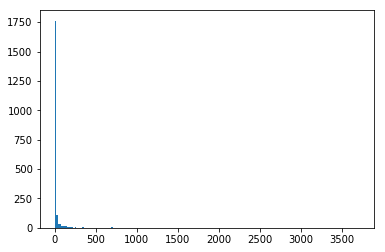

In [66]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

In [67]:
vc = data["brand_name"].value_counts() < 5
mask = pd.DataFrame(vc[vc])
data.loc[data["brand_name"].isin(mask.index), "brand_name"] = "Other"

data["brand_name"].value_counts()["Other"]

2286

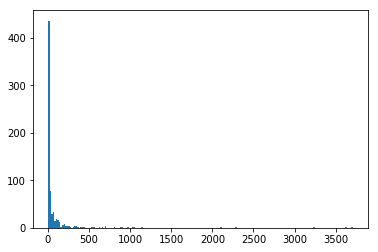

In [68]:
plt.hist(data["brand_name"].value_counts(), bins=200)
plt.show()

In [70]:
data["name_and_brand"] = data["name"].map(str) + ' ' + data["brand_name"].map(str)
data = data.drop("name", axis=1)
data.head()

,item_condition_id,brand_name,price,shipping,item_description,0_category,1_category,2_category,name_and_brand
train_id,,,,,,,,,
0,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts,MLB Cincinnati Reds T Shirt Size XL nan
1,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,Razer BlackWidow Chroma Keyboard Razer
2,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,AVA-VIV Blouse Target
3,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,Leather Horse Statues nan
4,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,24K GOLD plated rose nan
